<a href="https://colab.research.google.com/github/fajarpw/PCVK_Genap_2021/blob/main/WEEK10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Import Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

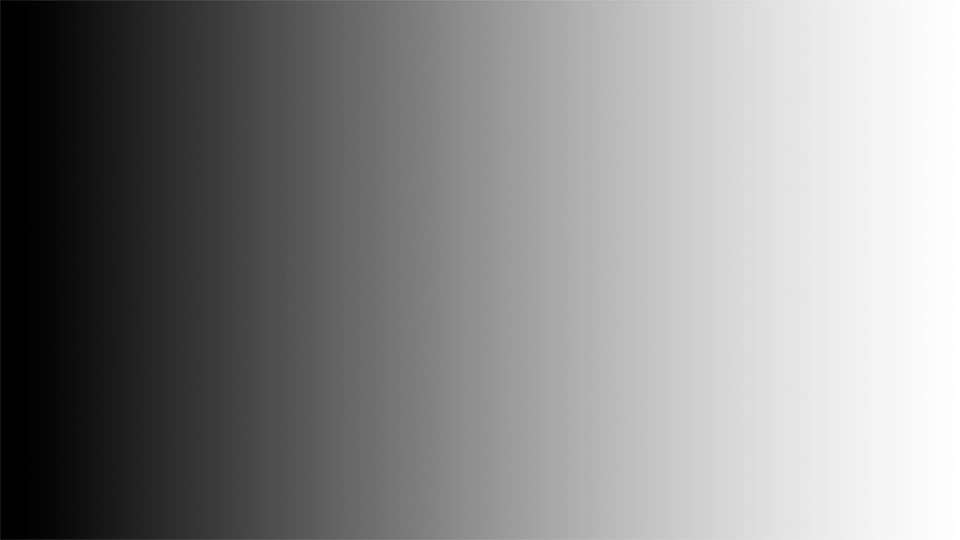

In [11]:
# Load image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
cv2_imshow(img)

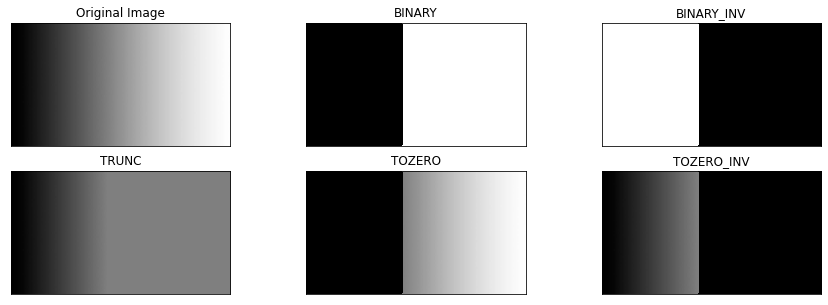

In [86]:
thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

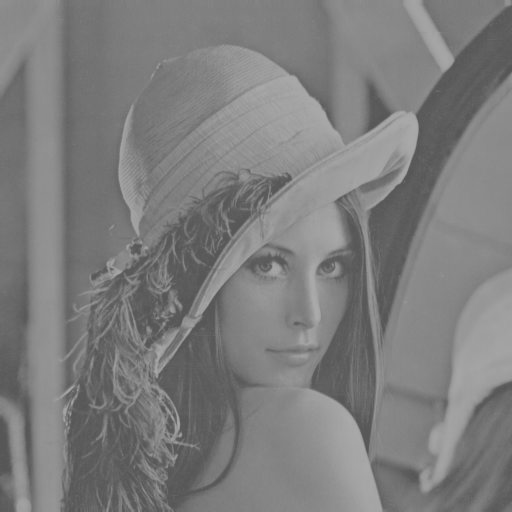

In [61]:
# Load Image Lena
img_lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_gs_lc.jpg',0)
cv2_imshow(img_lena)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply


122 255.0


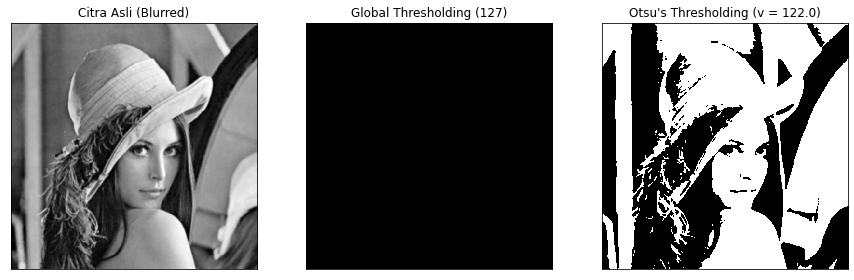

In [73]:
thresh_value = 255

img_lena_blurred = cv.GaussianBlur(img_lena,(5,5),0)
ret,thresh_lena = cv.threshold(img_lena_blurred,thresh_value,255,cv.THRESH_BINARY)

my_thresh = np.zeros(img_lena.shape, img_lena.dtype)

for i in range(img_lena.shape[0]):
  for j in range(img_lena.shape[1]):
    if img_lena[i,j] > thresh:
      my_thresh[i,j] = 1
    elif img_lena[i,j] < thresh:
      my_thresh[i,j] = 0

color_list = []
next_color_list = []

for i in range(img_lena.shape[0]):
  for j in range(img_lena.shape[1]):
    color_list.append(img_lena[i,j])

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([img_lena_blurred],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
otsu_thresh_value = 0

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        otsu_thresh_value = i

# find otsu's threshold value with OpenCV function
ret2, otsu_thresh = cv2.threshold(img_lena_blurred,0,255,cv.THRESH_BINARY+cv2.THRESH_OTSU)
print (otsu_thresh_value,ret)
    
otsu_thresh_tittle = ("Otsu's Thresholding (v = ")+str(ret2)+")"
titles_lena = ['Citra Asli (Blurred)','Global Thresholding (127)', otsu_thresh_tittle]
images_lena = [img_lena_blurred, my_thresh, otsu_thresh]
plt.figure(figsize = (15,10))


for i in range(len(images_lena)):
  plt.subplot(1,3,i+1)
  plt.imshow(images_lena[i],'gray', interpolation='nearest')
  plt.title(titles_lena[i])
  plt.xticks([]),plt.yticks([])

plt.show()

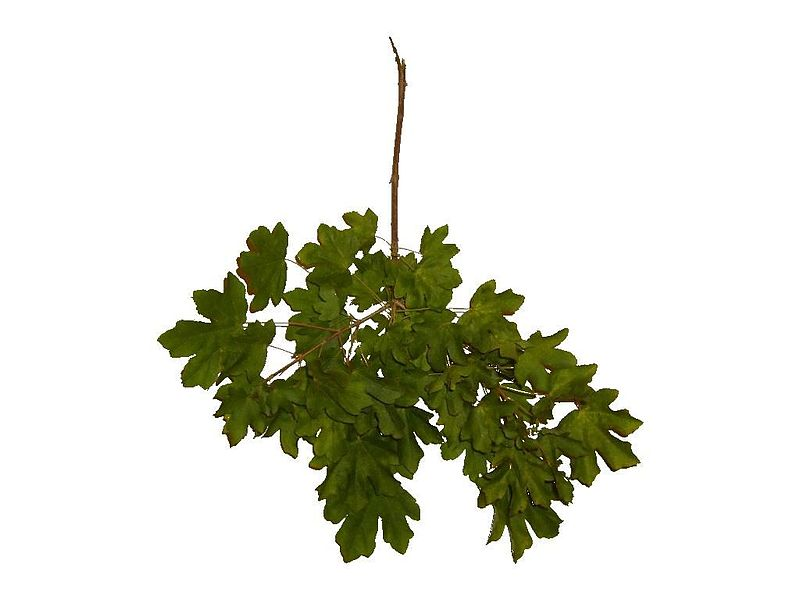

In [82]:
# Load Image Leaves
img_leaves = cv.imread('/content/drive/MyDrive/PCVK/Images/leaves.jpg')
gray_leaves = cv.imread('/content/drive/MyDrive/PCVK/Images/leaves.jpg',0)
cv2_imshow(img_leaves)

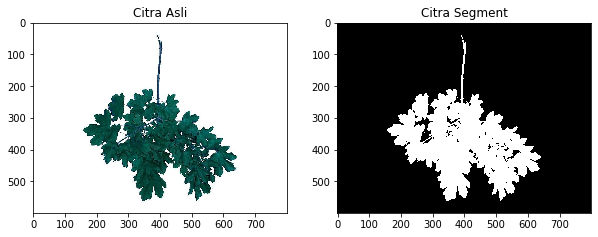

In [139]:
ret, otsu_thresh = cv.threshold(gray_leaves,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

titles_leaves = ['Citra Asli','Citra Segment', 'Histogram dari Keseluruhan Citra', 'Histogram dari Foreground']
titles_histo = ['Histogram dari Keseluruhan Citra', 'Histogram dari Foreground', '']
images_leaves = [img_leaves, otsu_thresh]
plt.figure(figsize = (10,5))

for i in range(len(images_leaves)):
  plt.subplot(1,2,i+1)
  plt.imshow(images_leaves[i],'gray', interpolation='nearest')
  plt.title(titles_leaves[i])

plt.show()

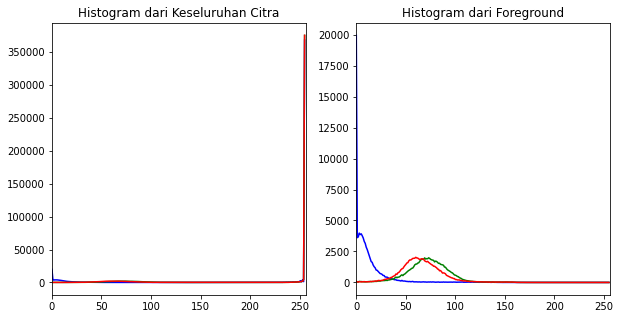

In [146]:
color = ('b','g','r')
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
for i,col in enumerate(color):
    histr1 = cv.calcHist([img_leaves],[i],None,[256],[0,256])
    plt.plot(histr1,color = col)
    plt.xlim([0,256])
plt.title('Histogram dari Keseluruhan Citra')

mask = otsu_thresh

plt.subplot(1,2,2)
for j,column in enumerate(color):
    histr2 = cv.calcHist([img_leaves],[j],mask,[256],[0,256])
    plt.plot(histr2,color = column)
    plt.xlim([0,256])
plt.title('Histogram dari Foreground')

plt.show()

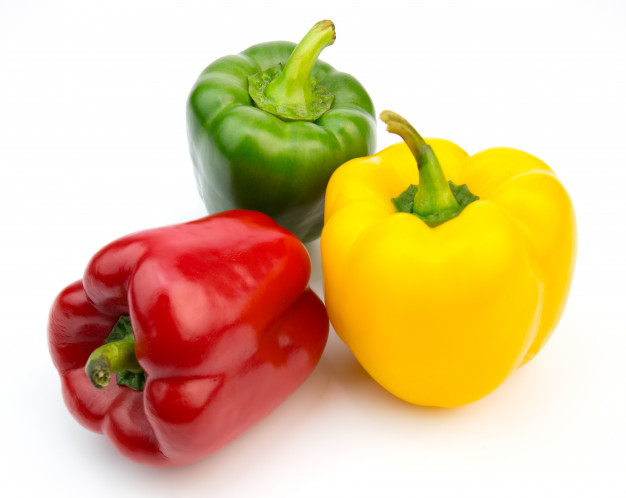

In [188]:
# Load Image Peppers
img_peppers = cv.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
cv2_imshow(img_peppers)

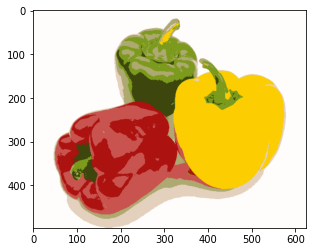

In [177]:
image_peppers = cv2.cvtColor(img_peppers, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image_peppers.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 8
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image_peppers.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

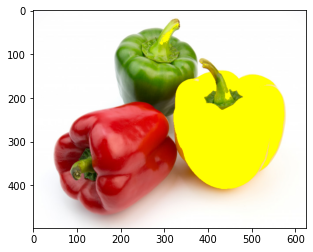

In [201]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image_peppers)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[labels == cluster] = [255, 255, 0]
# convert back to original shape
masked_image = masked_image.reshape(image_peppers.shape)
# show the image
plt.imshow(masked_image)
plt.show()

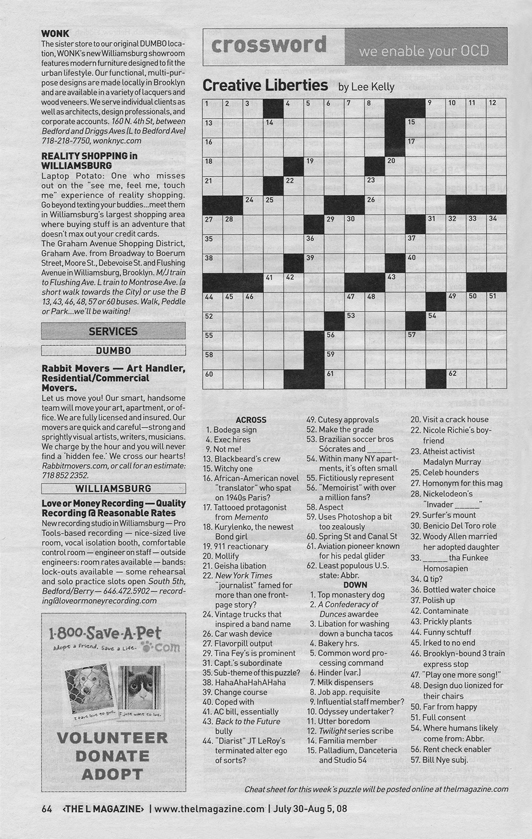

In [202]:
# Load Image Crossword
img_crossword = cv.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg',0)
cv2_imshow(img_crossword)

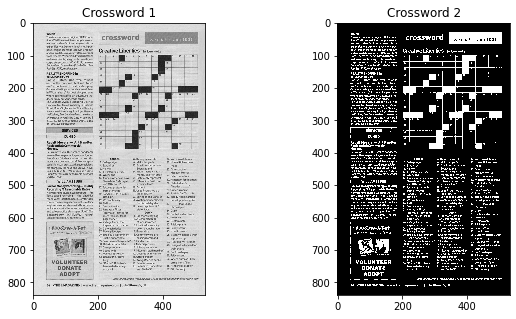

In [206]:
ret, otsu_thresh2 = cv.threshold(img_crossword,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

titles_corssword = ['Crossword 1', 'Crossword 2']
images_crossword = [img_crossword, otsu_thresh2]
plt.figure(figsize = (10,5))

for i in range(len(images_crossword)):
  plt.subplot(1,2,i+1)
  plt.imshow(images_crossword[i],'gray', interpolation='nearest')
  plt.title(titles_corssword[i])

plt.show()